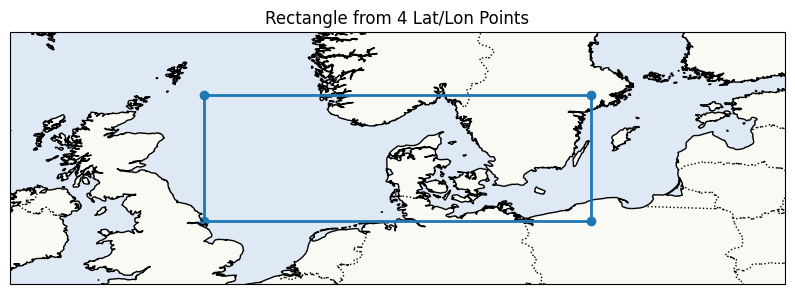

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_rectangle(latitudes, longitudes):
    """
    latitudes:  list/tuple of 4 latitude values
    longitudes: list/tuple of 4 longitude values
    The points should go around the rectangle (e.g. clockwise).
    """

    if len(latitudes) != 4 or len(longitudes) != 4:
        raise ValueError("You must pass exactly 4 latitudes and 4 longitudes.")

    # Close the polygon by repeating the first point at the end
    lats = list(latitudes) + [latitudes[0]]
    lons = list(longitudes) + [longitudes[0]]

    # World map with PlateCarree projection
    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=proj)

    # Add basic map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, alpha=0.3)
    ax.add_feature(cfeature.OCEAN, alpha=0.3)

    # Set extent so the rectangle is clearly visible (add some margin)
    min_lon, max_lon = min(lons), max(lons)
    min_lat, max_lat = min(lats), max(lats)
    lon_margin = (max_lon - min_lon) * 0.5 or 5
    lat_margin = (max_lat - min_lat) * 0.5 or 5
    ax.set_extent([min_lon - lon_margin, max_lon + lon_margin,
                   min_lat - lat_margin, max_lat + lat_margin],
                  crs=proj)

    # Plot rectangle outline
    ax.plot(lons, lats, transform=proj, linewidth=2)

    # Plot corner points
    ax.scatter(longitudes, latitudes, transform=proj)

    plt.title("Rectangle from 4 Lat/Lon Points")
    plt.show()


if __name__ == "__main__":
    # Example points (roughly a box around Denmark, order matters)
    
    latitudes  = [53.8, 59.4, 59.4, 53.8]
    longitudes = [2.6*1e-4, 2.6*1e-4, 17.2, 17.2]

    plot_rectangle(latitudes, longitudes)
